In [280]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./canna/strain_data_v2.csv')

In [3]:
df.shape

(3242, 19)

In [4]:
df.sample(10).sort_index().T

,323,559,621,992,1015,1508,2206,2840,2948,3152
calm_vs_ener,NaN,NaN,NaN,--position:97.29287124005852%,--position:2.4645557813241514%,--position:86.97464261529902%,--position:82.81110953173143%,NaN,--position:63.56651255748113%,--position:3.296532834510196%
cbd_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
child_1,NaN,NaN,NaN,NaN,Blue Ox,NaN,NaN,NaN,NaN,NaN
child_2,NaN,NaN,NaN,NaN,CBD OX,NaN,NaN,NaN,NaN,NaN
eff_pct,NaN,NaN,NaN,"69,%,60,%,52,%,43,%,43,%,34,%,30,%,26,%,8,%,8,...",NaN,"56,%,48,%,39,%,32,%,24,%,41,%,34,%,31,%,25,%,2...",NaN,NaN,"68,%,68,%,58,%,47,%,42,%,38,%,34,%,28,%,27,%,1...","61,%,47,%,47,%,38,%,33,%,38,%,38,%,28,%,28,%,2..."
effects,NaN,NaN,NaN,"Uplifted, ,Euphoric, ,Energetic, ,Relaxed, ,Cr...",NaN,"Euphoric, ,Happy, ,Uplifted, ,Creative, ,Relax...",NaN,NaN,"Happy, ,Relaxed, ,Uplifted, ,Euphoric, ,Creati...","Relaxed, ,Euphoric, ,Happy, ,Sleepy, ,Tingly, ..."
grow_all,NaN,NaN,"Easy,30 - 78,1 - 3,7 - 9",NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_rate_rvws,11,3,1,31,20,121,37,20,97,32
n_reported_effects,NaN,NaN,NaN,23 people reported 134 effects,NaN,94 people reported 632 effects,NaN,NaN,70 people reported 572 effects,21 people reported 152 effects
parent_1,Romulan,Appalachia,Ginger Ale,Trainwreck,Blue Moonshine,Afghani,Headband,Tangie,NaN,NaN


In [5]:
df.dtypes

calm_vs_ener           object
cbd_pct               float64
child_1                object
child_2                object
eff_pct                object
effects                object
grow_all               object
n_rate_rvws           float64
n_reported_effects     object
parent_1               object
parent_2               object
pop_loc                object
prim_type              object
rating                float64
strain                 object
terp_bar_pct           object
terp_descrip           object
terpenes               object
thc_pct               float64
dtype: object

In [6]:
df.isnull().sum()

calm_vs_ener          1737
cbd_pct               3216
child_1               2995
child_2               2995
eff_pct               2004
effects               2004
grow_all              3079
n_rate_rvws            308
n_reported_effects    2004
parent_1              1511
parent_2              1511
pop_loc                666
prim_type                0
rating                 308
strain                   0
terp_bar_pct          2847
terp_descrip          2847
terpenes              2847
thc_pct               2432
dtype: int64

In [7]:
df_copy = df.copy()

In [8]:
df_copy['calm_vs_ener'] = df_copy['calm_vs_ener'].str.replace('[a-zA-Z-%:]','',regex=True).astype('float64')
df_copy['calm_vs_ener']

0       55.710916
1       68.579642
2       89.466798
3       88.415222
4       97.690063
          ...    
3237    57.276062
3238    33.656710
3239    94.107765
3240    41.576603
3241    72.894438
Name: calm_vs_ener, Length: 3242, dtype: float64

In [9]:
df_copy = df_copy.join(df_copy['eff_pct'].str.split(',%,', expand=True))

In [10]:
df_copy

,calm_vs_ener,cbd_pct,child_1,child_2,eff_pct,effects,grow_all,n_rate_rvws,n_reported_effects,parent_1,...,5,6,7,8,9,10,11,12,13,14
0,55.710916,NaN,Cherry Sauce,Alf,"59,%,59,%,51,%,44,%,30,%,36,%,28,%,24,%,23,%,1...","Relaxed, ,Happy, ,Euphoric, ,Uplifted, ,Creati...","Moderate,30 - 78,3 - 6,7 - 9",1811.0,1209 people reported 8899 effects,Durban Poison,...,36,28,24,23,14,27,15,6,4,"4,%"
1,68.579642,NaN,Travel Joint,El Perro,"63,%,56,%,50,%,48,%,33,%,30,%,27,%,23,%,18,%,1...","Happy, ,Relaxed, ,Euphoric, ,Uplifted, ,Focuse...",NaN,541.0,386 people reported 2899 effects,Tres Dawg,...,30,27,23,18,15,31,14,10,4,"2,%"
2,89.466798,NaN,Lemon Ice,Lemon Cookies,"67,%,54,%,53,%,46,%,43,%,34,%,27,%,24,%,19,%,1...","Happy, ,Uplifted, ,Euphoric, ,Energetic, ,Rela...","Moderate,30 - 78,1 - 3,10 - 12",2271.0,1582 people reported 12309 effects,Silver Haze,...,34,27,24,19,11,38,19,10,10,"6,%"
3,88.415222,NaN,Amnesia White,Monster Profit,"70,%,64,%,58,%,45,%,45,%,37,%,31,%,25,%,23,%,1...","Happy, ,Euphoric, ,Uplifted, ,Energetic, ,Crea...","Moderate,30 - 78,3 - 6,10 - 12",1389.0,1011 people reported 8816 effects,South Asian Indica,...,37,31,25,23,14,42,22,15,13,"6,%"
4,97.690063,NaN,DJ Andy Williams,Lemonder,"56,%,55,%,55,%,50,%,42,%,35,%,27,%,25,%,18,%,1...","Happy, ,Uplifted, ,Energetic, ,Euphoric, ,Crea...","Moderate,> 78,1 - 3,10 - 12",2021.0,1465 people reported 10581 effects,Lemon Skunk,...,35,27,25,18,16,29,17,8,6,"6,%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,57.276062,NaN,Kid N' Kookies,The Big Dirty,"62,%,59,%,54,%,47,%,35,%,36,%,28,%,27,%,27,%,1...","Happy, ,Relaxed, ,Euphoric, ,Uplifted, ,Creati...","Moderate,< 30,0.5 - 1,7 - 9",6956.0,4515 people reported 35650 effects,Durban Poison,...,36,28,27,27,14,27,14,5,5,"4,%"
3238,33.656710,NaN,NaN,NaN,"66,%,58,%,46,%,40,%,24,%,26,%,20,%,17,%,17,%,1...","Relaxed, ,Happy, ,Euphoric, ,Uplifted, ,Hungry...",NaN,908.0,620 people reported 3994 effects,NaN,...,26,20,17,17,11,21,10,6,3,"2,%"
3239,94.107765,NaN,Diesel Duff,Champagne Diesel,"62,%,54,%,54,%,50,%,43,%,38,%,29,%,28,%,24,%,1...","Happy, ,Uplifted, ,Euphoric, ,Energetic, ,Crea...","Moderate,> 78,1 - 3,10 - 12",7571.0,5086 people reported 40754 effects,Chemdog 91,...,38,29,28,24,13,35,19,10,8,"5,%"
3240,41.576603,NaN,The Bling,VVS Chem,"59,%,54,%,51,%,41,%,29,%,29,%,24,%,24,%,20,%,1...","Relaxed, ,Happy, ,Euphoric, ,Uplifted, ,Creati...",NaN,1508.0,993 people reported 6909 effects,Thin Mint GSC,...,29,24,24,20,12,25,12,5,4,"4,%"


In [11]:
df_copy.columns = ['calm_vs_ener',
 'cbd_pct',
 'child_1',
 'child_2',
 'eff_pct',
 'effects',
 'grow_all',
 'n_rate_rvws',
 'n_reported_effects',
 'parent_1',
 'parent_2',
 'pop_loc',
 'prim_type',
 'rating',
 'strain',
 'terp_bar_pct',
 'terp_descrip',
 'terpenes',
 'thc_pct',
 'relaxed','happy', 'euphoric', 'uplifted', 'creative', 
 'stress', 'depression', 'anxiety', 'pain', 'insomnia', 
 'dry_mouth', 'dry_eyes', 'dizzy', 'anxious', 'paranoid'] 

In [12]:
df_copy.paranoid = df_copy.paranoid.str.replace('[,%]','',regex=True)

In [13]:
df_copy.loc[:,'relaxed':'paranoid'] = df_copy.loc[:,'relaxed':'paranoid'].replace('[,%]','',regex=True).astype('float64')

In [14]:
df_copy.isnull().sum()

calm_vs_ener          1737
cbd_pct               3216
child_1               2995
child_2               2995
eff_pct               2004
effects               2004
grow_all              3079
n_rate_rvws            308
n_reported_effects    2004
parent_1              1511
parent_2              1511
pop_loc                666
prim_type                0
rating                 308
strain                   0
terp_bar_pct          2847
terp_descrip          2847
terpenes              2847
thc_pct               2432
relaxed               2004
happy                 2004
euphoric              2004
uplifted              2004
creative              2004
stress                2004
depression            2004
anxiety               2004
pain                  2004
insomnia              2004
dry_mouth             2004
dry_eyes              2004
dizzy                 2019
anxious               2081
paranoid              2214
dtype: int64

In [15]:
df_copy.drop(['effects', 'eff_pct'],axis=1, inplace=True)

In [17]:
df_copy = df_copy.join(df_copy['grow_all'].str.split(',', expand=True))

In [19]:
df_copy.columns = ['calm_vs_ener',
 'cbd_pct',
 'child_1',
 'child_2',
 'grow_all',
 'n_rate_rvws',
 'n_reported_effects',
 'parent_1',
 'parent_2',
 'pop_loc',
 'prim_type',
 'rating',
 'strain',
 'terp_bar_pct',
 'terp_descrip',
 'terpenes',
 'thc_pct',
 'relaxed','happy', 'euphoric', 'uplifted', 'creative', 
 'stress', 'depression', 'anxiety', 'pain', 'insomnia', 
 'dry_mouth', 'dry_eyes', 'dizzy', 'anxious', 'paranoid',
 'grw_difficulty', 'height_in', 'yield_oz', 'flwr_wks'] 

In [21]:
df_copy.drop('grow_all', axis = 1, inplace=True)

In [48]:
df_copy = df_copy.join(df_copy['n_reported_effects'].str.split(' ',expand=True))

In [49]:
df_copy.drop([1, 2, 4], axis = 1, inplace=True)

In [65]:
df_copy.columns = ['calm_vs_ener',
 'cbd_pct',
 'child_1',
 'child_2',
 'n_rate_rvws',
 'n_eff_all',
 'parent_1',
 'parent_2',
 'pop_loc',
 'prim_type',
 'rating',
 'strain',
 'terp_bar_pct',
 'terp_descrip',
 'terpenes',
 'thc_pct',
 'relaxed','happy', 'euphoric', 'uplifted', 'creative', 
 'stress', 'depression', 'anxiety', 'pain', 'insomnia', 
 'dry_mouth', 'dry_eyes', 'dizzy', 'anxious', 'paranoid',
 'grw_difficulty', 'height_in', 'yield_oz', 'flwr_wks',
 'n_people_eff', 'n_eff_reported']

In [77]:
df_copy.loc['n_people_eff':'n_eff_reported'] = df_copy.loc['n_people_eff':'n_eff_reported'].astype('float64')

In [186]:
df_copy.sample(10).T

,2966,637,1110,913,1021,1712,3043,1951,2700,2813
calm_vs_ener,97.1988,NaN,55.2185,NaN,31.7106,NaN,4.05839,99.379,19.3814,18.0352
cbd_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
child_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rawtton
child_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Orange Harambe
n_rate_rvws,42,4,38,3,74,13,862,18,29,28
n_eff_all,29 people reported 344 effects,NaN,32 people reported 269 effects,NaN,56 people reported 485 effects,NaN,603 people reported 4410 effects,NaN,NaN,17 people reported 152 effects
parent_1,NaN,NaN,North Indian,NaN,Jedi Kush,Afghan Hawaiian,NaN,NaN,NaN,Orange Skunk
parent_2,NaN,NaN,Skunk No. 1,NaN,Master Kush,Super Skunk,NaN,NaN,NaN,Herijuana
pop_loc,"Danvers, MA,Arcata, CA,Baltimore, MD,Keizer, O...","Ferndale, WA,Bellingham, WA,Seattle, WA,Everso...","Carolina, PR,Salem, OR,San Juan, PR",NaN,"Adrian, MI,Ferndale, MI,Flint, MI,Old Orchard ...",NaN,"Portland, OR,Seattle, WA,Eugene, OR,Salem, OR,...","Ferndale, WA,Seattle, WA,Bellingham, WA,Bothel...","Seattle, WA,Phoenix, AZ,Claremore, OK,Los Ange...","Denver, CO,Northglenn, CO,Seattle, WA,Colorado..."
prim_type,Sativa,Hybrid,Indica,Hybrid,Indica,Indica,Indica,Sativa,Hybrid,Indica


In [323]:
df_copy.head().T

,0,1,2,3,4
calm_vs_ener,55.7109,68.5796,89.4668,88.4152,97.6901
cbd_pct,NaN,NaN,NaN,NaN,NaN
child_1,Cherry Sauce,Travel Joint,Lemon Ice,Amnesia White,DJ Andy Williams
child_2,Alf,El Perro,Lemon Cookies,Monster Profit,Lemonder
n_rate_rvws,1811,541,2271,1389,2021
n_eff_all,1209 people reported 8899 effects,386 people reported 2899 effects,1582 people reported 12309 effects,1011 people reported 8816 effects,1465 people reported 10581 effects
parent_1,Durban Poison,Tres Dawg,Silver Haze,South Asian Indica,Lemon Skunk
parent_2,Granddaddy Purple,Chemdog 4,Lemon Skunk,Cambodian,Super Silver Haze
pop_loc,"Seattle, WA,Portland, OR,Everett, WA,Oklahoma ...","Silver Spring, MD,Portland, OR,Everett, WA,Den...","Oklahoma City, OK,Kingston, WA,Gardner, MA,Tul...","Portland, OR,Oklahoma City, OK,Eugene, OR,Corv...","Silver Spring, MD,Seattle, WA,Everett, WA,Spok..."
prim_type,Hybrid,Hybrid,Sativa,Sativa,Sativa


(array([  2.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   2.,   1.,  21.,
         15.,  17.,  71.,  36., 316., 575., 677., 788., 410.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 20 Patch objects>)

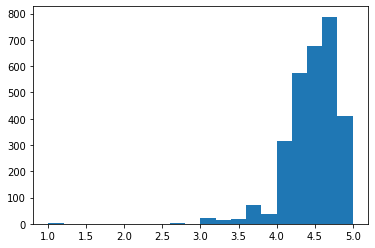

In [248]:
plt.hist(df_copy['rating'].dropna(), bins=20)

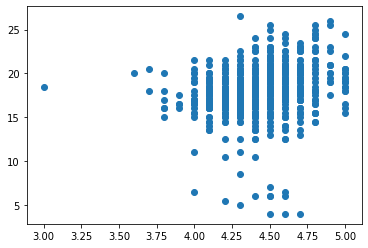

In [266]:
plt.scatter(x= df_copy['rating'], y= df_copy['thc_pct'])

In [277]:
scatter_df = df_copy[['rating', 'thc_pct']]
scatter_df

,rating,thc_pct
0,4.3,16.0
1,4.4,20.5
2,4.2,19.0
3,4.2,19.5
4,4.4,18.0
...,...,...
3237,4.4,19.0
3238,4.6,21.5
3239,4.3,19.0
3240,4.7,17.5


In [278]:
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

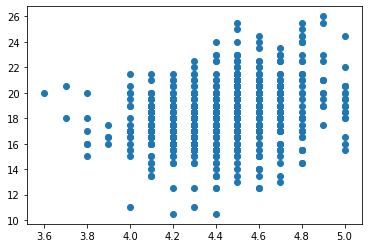

In [279]:
plt.scatter(x= scatter_df['rating'], y= scatter_df['thc_pct'])

TypeError: nan is not a string

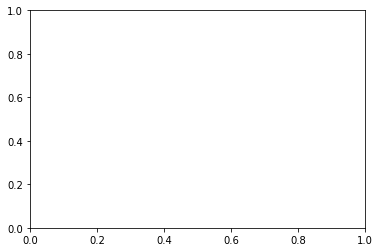

In [354]:
plt.scatter(x= df_copy[''], y= df_copy['n_rate_rvws'])

In [296]:
corr_df = df_copy.corr(method='pearson')
corr_df

,calm_vs_ener,cbd_pct,n_rate_rvws,rating,thc_pct,stress,depression,anxiety,pain,insomnia,dry_mouth,dry_eyes,dizzy,anxious,paranoid
calm_vs_ener,1.000000,0.222030,0.034753,-0.084189,0.013402,-0.091782,-0.154046,-0.191503,-0.221453,-0.301978,-0.051164,-0.019387,0.071165,0.142549,0.144334
cbd_pct,0.222030,1.000000,-0.171600,0.263187,0.899434,-0.554510,-0.628796,-0.626911,-0.706403,-0.607229,-0.555802,-0.253966,-0.080450,-0.323432,-0.317083
n_rate_rvws,0.034753,-0.171600,1.000000,-0.082955,-0.043858,-0.063814,-0.087337,-0.031311,-0.007705,-0.087101,0.051950,0.033456,-0.041001,0.038256,0.034550
rating,-0.084189,0.263187,-0.082955,1.000000,0.232534,-0.091174,-0.019964,-0.001788,0.023046,0.100107,-0.320378,-0.293794,-0.330495,-0.364556,-0.330662
thc_pct,0.013402,0.899434,-0.043858,0.232534,1.000000,-0.164385,-0.154102,-0.175968,-0.131725,-0.123762,-0.022637,-0.031885,-0.019653,-0.023543,-0.024202
stress,-0.091782,-0.554510,-0.063814,-0.091174,-0.164385,1.000000,0.900283,0.837678,0.791213,0.737560,0.517959,0.550369,0.181562,0.169111,0.051345
depression,-0.154046,-0.628796,-0.087337,-0.019964,-0.154102,0.900283,1.000000,0.900057,0.834838,0.796538,0.480074,0.515860,0.125325,0.117830,0.004049
anxiety,-0.191503,-0.626911,-0.031311,-0.001788,-0.175968,0.837678,0.900057,1.000000,0.908821,0.838339,0.482162,0.529093,0.102635,0.108661,-0.033491
pain,-0.221453,-0.706403,-0.007705,0.023046,-0.131725,0.791213,0.834838,0.908821,1.000000,0.884420,0.497162,0.548779,0.121612,0.113768,-0.025091
insomnia,-0.301978,-0.607229,-0.087101,0.100107,-0.123762,0.737560,0.796538,0.838339,0.884420,1.000000,0.443160,0.493085,0.079843,0.071021,-0.057463


In [311]:
corr_df[corr_df > 0.5]

,calm_vs_ener,cbd_pct,n_rate_rvws,rating,thc_pct,stress,depression,anxiety,pain,insomnia,dry_mouth,dry_eyes,dizzy,anxious,paranoid
calm_vs_ener,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cbd_pct,NaN,1.000000,NaN,NaN,0.899434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_rate_rvws,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thc_pct,NaN,0.899434,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stress,NaN,NaN,NaN,NaN,NaN,1.000000,0.900283,0.837678,0.791213,0.737560,0.517959,0.550369,NaN,NaN,NaN
depression,NaN,NaN,NaN,NaN,NaN,0.900283,1.000000,0.900057,0.834838,0.796538,NaN,0.515860,NaN,NaN,NaN
anxiety,NaN,NaN,NaN,NaN,NaN,0.837678,0.900057,1.000000,0.908821,0.838339,NaN,0.529093,NaN,NaN,NaN
pain,NaN,NaN,NaN,NaN,NaN,0.791213,0.834838,0.908821,1.000000,0.884420,NaN,0.548779,NaN,NaN,NaN
insomnia,NaN,NaN,NaN,NaN,NaN,0.737560,0.796538,0.838339,0.884420,1.000000,NaN,NaN,NaN,NaN,NaN


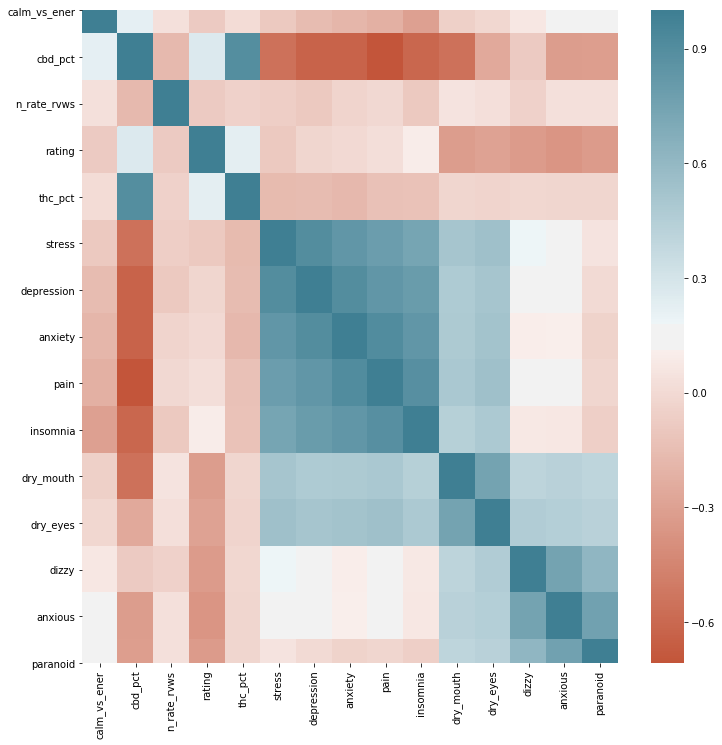

In [315]:
plt.figure(figsize=(12,12))
c_map = sns.diverging_palette(20, 220, n=200, as_cmap=True)
sns.heatmap(corr_df, cmap=c_map)

In [317]:
group_type = df_copy.groupby('prim_type')

In [318]:
for key, values in group_type:
    print(key) #this indicates the grouping
    print('-'*70)
    print(values) #this is a dataframe for that 
    print('\n')

Edible
----------------------------------------------------------------------
    calm_vs_ener  cbd_pct child_1 child_2  n_rate_rvws n_eff_all parent_1  \
97           NaN      NaN     NaN     NaN          NaN       NaN      NaN   

   parent_2                                            pop_loc prim_type  ...  \
97      NaN  Oklahoma City, OK,Tulsa, OK,Denver, CO,Seattle...    Edible  ...   

    dry_eyes dizzy anxious paranoid grw_difficulty  height_in yield_oz  \
97       NaN   NaN     NaN      NaN            NaN        NaN      NaN   

   flwr_wks n_people_eff n_eff_reported  
97      NaN          NaN            NaN  

[1 rows x 37 columns]


Hybrid
----------------------------------------------------------------------
      calm_vs_ener  cbd_pct           child_1           child_2  n_rate_rvws  \
0        55.710916      NaN      Cherry Sauce               Alf       1811.0   
1        68.579642      NaN      Travel Joint          El Perro        541.0   
5        77.716744      NaN 

In [322]:
group_type['rating'].mean()

prim_type
Edible         NaN
Hybrid    4.474297
Indica    4.436340
Sativa    4.431992
Name: rating, dtype: float64

## This is the test set:

In [216]:
test_df = df_copy.copy()

In [ ]:
test_df.paranoid = test_df.paranoid.str.replace('[,%]','',regex=True)

In [ ]:
test_df.loc[:,'stress':'paranoid'] = test_df.loc[:,'stress':'paranoid'].replace('[,%]','',regex=True).astype('float64')

In [41]:
test_df.head()


,calm_vs_ener,cbd_pct,child_1,child_2,n_rate_rvws,n_reported_effects,parent_1,parent_2,pop_loc,prim_type,...,paranoid,grw_difficulty,height_in,yield_oz,flwr_wks,0,1,2,3,4
0,55.710916,NaN,Cherry Sauce,Alf,1811.0,1209 people reported 8899 effects,Durban Poison,Granddaddy Purple,"Seattle, WA,Portland, OR,Everett, WA,Oklahoma ...",Hybrid,...,4.0,Moderate,30 - 78,3 - 6,7 - 9,1209,people,reported,8899,effects
1,68.579642,NaN,Travel Joint,El Perro,541.0,386 people reported 2899 effects,Tres Dawg,Chemdog 4,"Silver Spring, MD,Portland, OR,Everett, WA,Den...",Hybrid,...,2.0,NaN,NaN,NaN,NaN,386,people,reported,2899,effects
2,89.466798,NaN,Lemon Ice,Lemon Cookies,2271.0,1582 people reported 12309 effects,Silver Haze,Lemon Skunk,"Oklahoma City, OK,Kingston, WA,Gardner, MA,Tul...",Sativa,...,6.0,Moderate,30 - 78,1 - 3,10 - 12,1582,people,reported,12309,effects
3,88.415222,NaN,Amnesia White,Monster Profit,1389.0,1011 people reported 8816 effects,South Asian Indica,Cambodian,"Portland, OR,Oklahoma City, OK,Eugene, OR,Corv...",Sativa,...,6.0,Moderate,30 - 78,3 - 6,10 - 12,1011,people,reported,8816,effects
4,97.690063,NaN,DJ Andy Williams,Lemonder,2021.0,1465 people reported 10581 effects,Lemon Skunk,Super Silver Haze,"Silver Spring, MD,Seattle, WA,Everett, WA,Spok...",Sativa,...,6.0,Moderate,> 78,1 - 3,10 - 12,1465,people,reported,10581,effects


In [44]:
test_df = test_df.join(test_df['n_reported_effects'].str.split(' ',expand=True))
test_df.drop([1, 2, 4], axis = 1, inplace=True)

ValueError: columns overlap but no suffix specified: Index([0, 1, 2, 3, 4], dtype='object')

In [167]:
test_df.drop([1, 2, 4], axis = 1, inplace=True)

KeyError: '[1 2 4] not found in axis'

In [214]:
test_df

,calm_vs_ener,cbd_pct,child_1,child_2,n_rate_rvws,n_eff_all,parent_1,parent_2,pop_loc,prim_type,...,dry_eyes,dizzy,anxious,paranoid,grw_difficulty,height_in,yield_oz,flwr_wks,n_people_eff,n_eff_reported
0,55.710916,NaN,Cherry Sauce,Alf,1811.0,1209 people reported 8899 effects,Durban Poison,Granddaddy Purple,"[Seattle, WA, Portland, OR, Everett, WA, Oklah...",Hybrid,...,15.0,6.0,4.0,4.0,Moderate,30 - 78,3 - 6,7 - 9,1209,8899
1,68.579642,NaN,Travel Joint,El Perro,541.0,386 people reported 2899 effects,Tres Dawg,Chemdog 4,"[Silver Spring, MD, Portland, OR, Everett, WA,...",Hybrid,...,14.0,10.0,4.0,2.0,NaN,NaN,NaN,NaN,386,2899
2,89.466798,NaN,Lemon Ice,Lemon Cookies,2271.0,1582 people reported 12309 effects,Silver Haze,Lemon Skunk,"[Oklahoma City, OK, Kingston, WA, Gardner, MA,...",Sativa,...,19.0,10.0,10.0,6.0,Moderate,30 - 78,1 - 3,10 - 12,1582,12309
3,88.415222,NaN,Amnesia White,Monster Profit,1389.0,1011 people reported 8816 effects,South Asian Indica,Cambodian,"[Portland, OR, Oklahoma City, OK, Eugene, OR, ...",Sativa,...,22.0,15.0,13.0,6.0,Moderate,30 - 78,3 - 6,10 - 12,1011,8816
4,97.690063,NaN,DJ Andy Williams,Lemonder,2021.0,1465 people reported 10581 effects,Lemon Skunk,Super Silver Haze,"[Silver Spring, MD, Seattle, WA, Everett, WA, ...",Sativa,...,17.0,8.0,6.0,6.0,Moderate,> 78,1 - 3,10 - 12,1465,10581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,57.276062,NaN,Kid N' Kookies,The Big Dirty,6956.0,4515 people reported 35650 effects,Durban Poison,OG Kush,"[Silver Spring, MD, Oklahoma City, OK, Los Ang...",Hybrid,...,14.0,5.0,5.0,4.0,Moderate,< 30,0.5 - 1,7 - 9,4515,35650
3238,33.656710,NaN,NaN,NaN,908.0,620 people reported 3994 effects,NaN,NaN,"[Silver Spring, MD, Seattle, WA, Ferndale, WA,...",Hybrid,...,10.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,620,3994
3239,94.107765,NaN,Diesel Duff,Champagne Diesel,7571.0,5086 people reported 40754 effects,Chemdog 91,Super Skunk,"[Silver Spring, MD, Seattle, WA, Portland, OR,...",Sativa,...,19.0,10.0,8.0,5.0,Moderate,> 78,1 - 3,10 - 12,5086,40754
3240,41.576603,NaN,The Bling,VVS Chem,1508.0,993 people reported 6909 effects,Thin Mint GSC,Sherbert,"[Silver Spring, MD, Seattle, WA, Phoenix, AZ, ...",Hybrid,...,12.0,5.0,4.0,4.0,NaN,NaN,NaN,NaN,993,6909


In [ ]:
# df_copy = df_copy.join(df_copy['eff_pct'].str.split(',%,', expand=True))
test_df = test_df.join(test_df['grow_all'].str.split(',', expand=True))
test_df


In [ ]:
test_df.columns.tolist()

In [182]:
test_df['pop_loc']

0       Seattle, WA,Portland, OR,Everett, WA,Oklahoma ...
1       Silver Spring, MD,Portland, OR,Everett, WA,Den...
2       Oklahoma City, OK,Kingston, WA,Gardner, MA,Tul...
3       Portland, OR,Oklahoma City, OK,Eugene, OR,Corv...
4       Silver Spring, MD,Seattle, WA,Everett, WA,Spok...
                              ...                        
3237    Silver Spring, MD,Oklahoma City, OK,Los Angele...
3238    Silver Spring, MD,Seattle, WA,Ferndale, WA,Eve...
3239    Silver Spring, MD,Seattle, WA,Portland, OR,Okl...
3240    Silver Spring, MD,Seattle, WA,Phoenix, AZ,Port...
3241    Seattle, WA,Silver Spring, MD,Portland, OR,Okl...
Name: pop_loc, Length: 3242, dtype: object

In [222]:
test_df = df_copy.copy()

In [220]:
test_df['pop_loc'] = test_df['pop_loc'].str.split(',')

In [149]:
test_df['pop_loc'][0][1::2]

[' WA', ' OR', ' WA', ' OK', ' OK', ' WA', ' WA', ' OR', ' WA', ' OR']

In [223]:
test_df['pop_loc'].value_counts()

Denver, CO                                                                                                                                     17
Portland, OR                                                                                                                                   14
Los Angeles, CA                                                                                                                                14
Seattle, WA                                                                                                                                    13
Oklahoma City, OK                                                                                                                              11
                                                                                                                                               ..
Seattle, WA,Kelso, WA,Everett, WA,Longview, WA,Maple Valley, WA,Tacoma, WA                                                  

In [245]:
test_df['pop_loc'] = test_df['pop_loc'].str.replace(', ',',').str.split(',')

In [246]:
test_df['pop_loc'].value_counts()

[Denver, CO]                                                                                                                                                   17
[Los Angeles, CA]                                                                                                                                              14
[Portland, OR]                                                                                                                                                 14
[Seattle, WA]                                                                                                                                                  13
[Oklahoma City, OK]                                                                                                                                            11
                                                                                                                                                               ..
[Detroit, MI, Lompoc, CA, Mu

In [231]:
so = pd.DataFrame({'locations': {0: 'Seattle, WA,Portland, OR,Everett, WA',
  1: 'Silver Spring, MD,Portland, OR,Everett, WA',
  2: 'Oklahoma City, OK,Kingston, WA,Gardner, MA',
  3: 'Portland, OR,Oklahoma City, OK,Eugene, OR',
  4: 'Silver Spring, MD,Seattle, WA,Everett, WA',
  3241: 'Seattle, WA,Silver Spring, MD,Portland, OR'}})
so

,locations
0,"Seattle, WA,Portland, OR,Everett, WA"
1,"Silver Spring, MD,Portland, OR,Everett, WA"
2,"Oklahoma City, OK,Kingston, WA,Gardner, MA"
3,"Portland, OR,Oklahoma City, OK,Eugene, OR"
4,"Silver Spring, MD,Seattle, WA,Everett, WA"
3241,"Seattle, WA,Silver Spring, MD,Portland, OR"


In [244]:
new_pop = (
    test_df.pop_loc.str.split(',')
    .dropna()
    .apply(lambda x: x+[''] if len(x)%2 != 0 else x)
    .apply(lambda x: [','.join(e) for e in np.asarray(x).reshape(-1,2)])
    .tolist()
)
new_pop

[['Seattle, WA',
  'Portland, OR',
  'Everett, WA',
  'Oklahoma City, OK',
  'Tulsa, OK',
  'Kingston, WA',
  'Everson, WA',
  'Salem, OR',
  'Bellingham, WA',
  'Eugene, OR'],
 ['Silver Spring, MD',
  'Portland, OR',
  'Everett, WA',
  'Denver, CO',
  'Baltimore, MD',
  'Rockville, MD',
  'Eugene, OR',
  'Oklahoma City, OK',
  'Seattle, WA',
  'Bellingham, WA'],
 ['Oklahoma City, OK',
  'Kingston, WA',
  'Gardner, MA',
  'Tulsa, OK',
  'Portland, OR',
  'Denver, CO',
  'Danvers, MA',
  'Edmond, OK',
  'Durango, CO',
  'Emeryville, CA'],
 ['Portland, OR',
  'Oklahoma City, OK',
  'Eugene, OR',
  'Corvallis, OR',
  'Astoria, OR',
  'Kelso, WA',
  'Longview, WA',
  'Norman, OK',
  'Salem, OR',
  'Seattle, WA'],
 ['Silver Spring, MD',
  'Seattle, WA',
  'Everett, WA',
  'Spokane, WA',
  'Oklahoma City, OK',
  'Vancouver, WA',
  'Los Angeles, CA',
  'Bellingham, WA',
  'Renton, WA',
  'Phoenix, AZ'],
 ['Portland, OR',
  'Oklahoma City, OK',
  'Seattle, WA',
  'Los Angeles, CA',
  'Las Vega